Exemplo de Palavras do vocabulário:
['00' '000' '10' '10 10' '10 br' '10 lines' '10 minutes' '10 stars'
 '10 year' '10 years' '100' '1000' '101' '11' '12' '12 year' '13' '13th'
 '14' '14 year' '15' '15 minutes' '15 years' '16' '17' '18' '19' '1930'
 '1930s' '1933']

Tópico 1:
brosnan | lonesome | dove | pierce | biko | santa | sabrina | kinnear | claus | springer | eagle | greg | south africa | burt | reynolds

Tópico 2:
fu | kung fu | kung | batman | khan | salman | akshay | kapoor | amitabh | govinda | sellers | spacey | kumar | bollywood | salman khan

Tópico 3:
carrey | pacino | jim carrey | freeman | al pacino | jim | morgan freeman | lone ranger | ranger | almighty | shylock | al | evan | grinch | morgan

Tópico 4:
matthau | stewart | laurel | ford | stooges | hardy | stan | laurel hardy | lemmon | western | bugs | muppet | damme | muppets | van damme

Tópico 5:
movie | great | love | br | really | good | loved | watch | story | think | movies | like | saw | seen | just

Tópico 6

c:\Users\Ander\miniconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


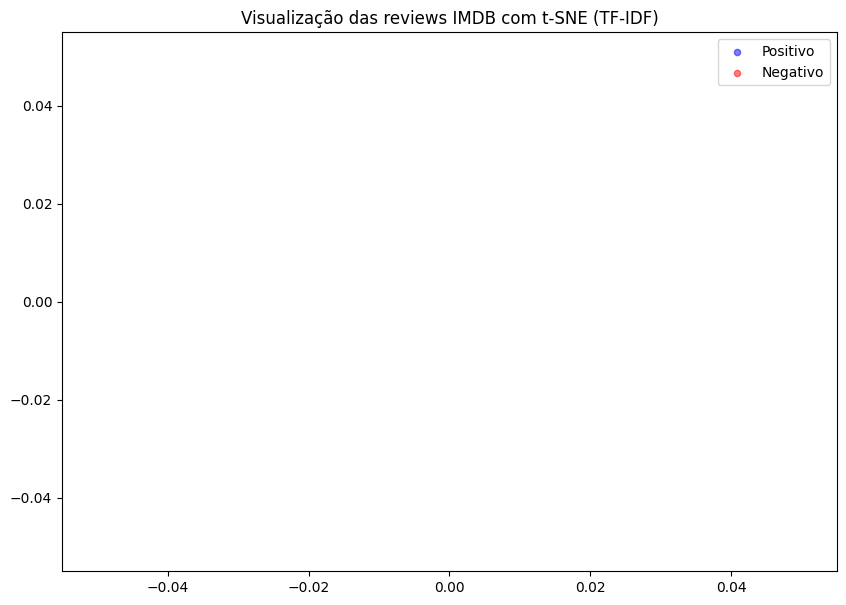

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 1. Carregar o dataset
url = "https://raw.githubusercontent.com/Ankit152/IMDB-sentiment-analysis/refs/heads/master/IMDB-Dataset.csv"
df = pd.read_csv(url)
review = df['review'].values
sentiment = df['sentiment'].values
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# 1. Computar o TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000, ngram_range=(1,2))
X_tfidf = vectorizer.fit_transform(review)
print("Exemplo de Palavras do vocabulário:")
print(vectorizer.get_feature_names_out()[:30])

# 2. Modelagem de tópicos com LDA
lda = LatentDirichletAllocation(n_components=10, random_state=42, learning_method='batch')
lda.fit(X_tfidf)

# 2.a. Mostra os tópicos
def display_topics(model, feature_names, no_top_words):
    for idx, topic in enumerate(model.components_):
        print(f"\nTópico {idx+1}:")
        top_features_indices = topic.argsort()[:-no_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_indices]
        print(" | ".join(top_features))

# 2.b. palavras mais relevantes
feature_names = vectorizer.get_feature_names_out()
display_topics(lda, feature_names, no_top_words=15)

# 3. Classificação do textos
X_train, X_test, y_train, y_test = train_test_split(
    df['review'], df['sentiment'], test_size=0.2, random_state=42, stratify=df['sentiment']
)
clf = LogisticRegression(max_iter=200, random_state=42)

X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)
X_train_topics = lda.fit_transform(X_train_counts)
X_test_topics = lda.transform(X_test_counts)
clf.fit(X_train_topics, y_train)
y_pred = clf.predict(X_test_topics)

# 4. Avaliação do desempenho
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de classificação:\n", classification_report(y_test, y_pred))
print("\nMatriz de confusão:\n", confusion_matrix(y_test, y_pred))

# 5. Visualização
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000, learning_rate=200)
X_tsne = tsne.fit_transform(X_tfidf.toarray())

plt.figure(figsize=(10, 7))
plt.scatter(X_tsne[sentiment==1, 0], X_tsne[sentiment==1, 1],
            c='blue', label='Positivo', alpha=0.5, s=20)
plt.scatter(X_tsne[sentiment==0, 0], X_tsne[sentiment==0, 1],
            c='red', label='Negativo', alpha=0.5, s=20)
plt.legend()
plt.title("Visualização das reviews IMDB com t-SNE (TF-IDF)")
plt.show()